In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from obspy.taup import TauPyModel
import function_repo as fr
import importlib
importlib.reload(fr)

<module 'function_repo' from 'c:\\Users\\18723\\Documents\\GitHub\\SURG-Mars\\function_repo.py'>

In [10]:
# load normal-fault-guess.csv as a dataframe
df = pd.read_csv("normal_fault_guess.csv")
df.head()

,Theta,Phi,Alpha,tx,ty,tz,px,py,pz,Strike1,Dip1,Rake1,Strike2,Dip2,Rake2,OldWeight,Weight
0,252.822459,67.038541,166.040541,-0.271934,-0.879696,0.390112,0.290293,-0.461492,-0.838305,269.215713,71.523235,-113.676050,143.356881,29.701155,-39.764030,0.887631,0.850971
1,252.822459,67.038541,164.420767,-0.271934,-0.879696,0.390112,0.264243,-0.458065,-0.848735,270.329372,71.077086,-112.173596,141.819737,28.836783,-42.250382,0.578548,0.815176
2,269.487863,61.611225,23.848788,-0.007863,-0.879707,0.475452,-0.417574,0.434915,0.797797,133.725964,25.799428,-31.581823,252.690002,76.824612,-112.382390,0.737822,0.893479
3,269.487863,61.611225,22.910972,-0.007863,-0.879707,0.475452,-0.402647,0.438004,0.803759,132.903809,25.238797,-32.986925,253.321888,76.576430,-111.573885,0.846452,0.912009
4,269.487863,61.611225,25.286573,-0.007863,-0.879707,0.475452,-0.440241,0.429954,0.788243,134.894838,26.675006,-29.516645,251.729631,77.221837,-113.614747,0.532316,0.718478


In [11]:
# weight is np.exp(-angle**2/(2*epsilon**2))

old_accepted1 = df["OldWeight"] >= np.exp(-1/2)
old_accepted2 = (df["OldWeight"] >= np.exp(-2)) & (df["OldWeight"] < np.exp(-1/2))
old_rejected = df["OldWeight"] < np.exp(-2)
accepted1 = df["Weight"] >= np.exp(-1/2)
accepted2 = (df["Weight"] >= np.exp(-2)) & (df["Weight"] < np.exp(-1/2))
rejected = df["Weight"] < np.exp(-2)

if len(df[rejected]) == 0:
    print("No rejected solutions")

No rejected solutions


In [12]:
# Plot the accepted and rejected guesses in 3D scatter plot
# Then plot pairwaise scatter plot of the accepted guesses
# Then beachballs of the accepted guesses, accounting for weight

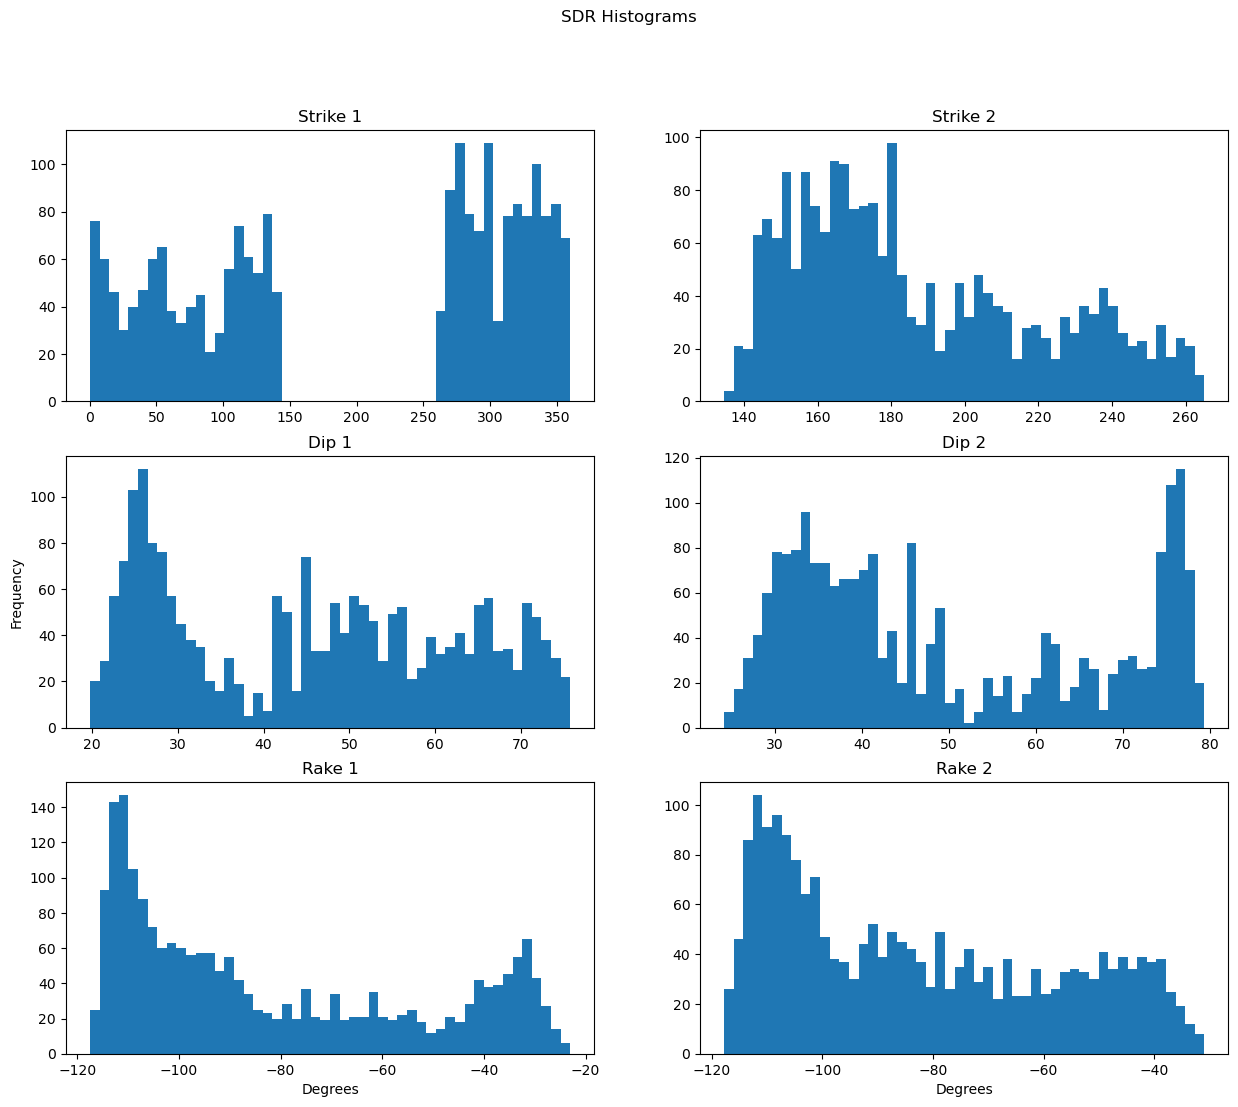

In [13]:
# histogram (sanity check)
fr.sdr_histograms(df)
# overlay histograms of accepted/rejected guesses

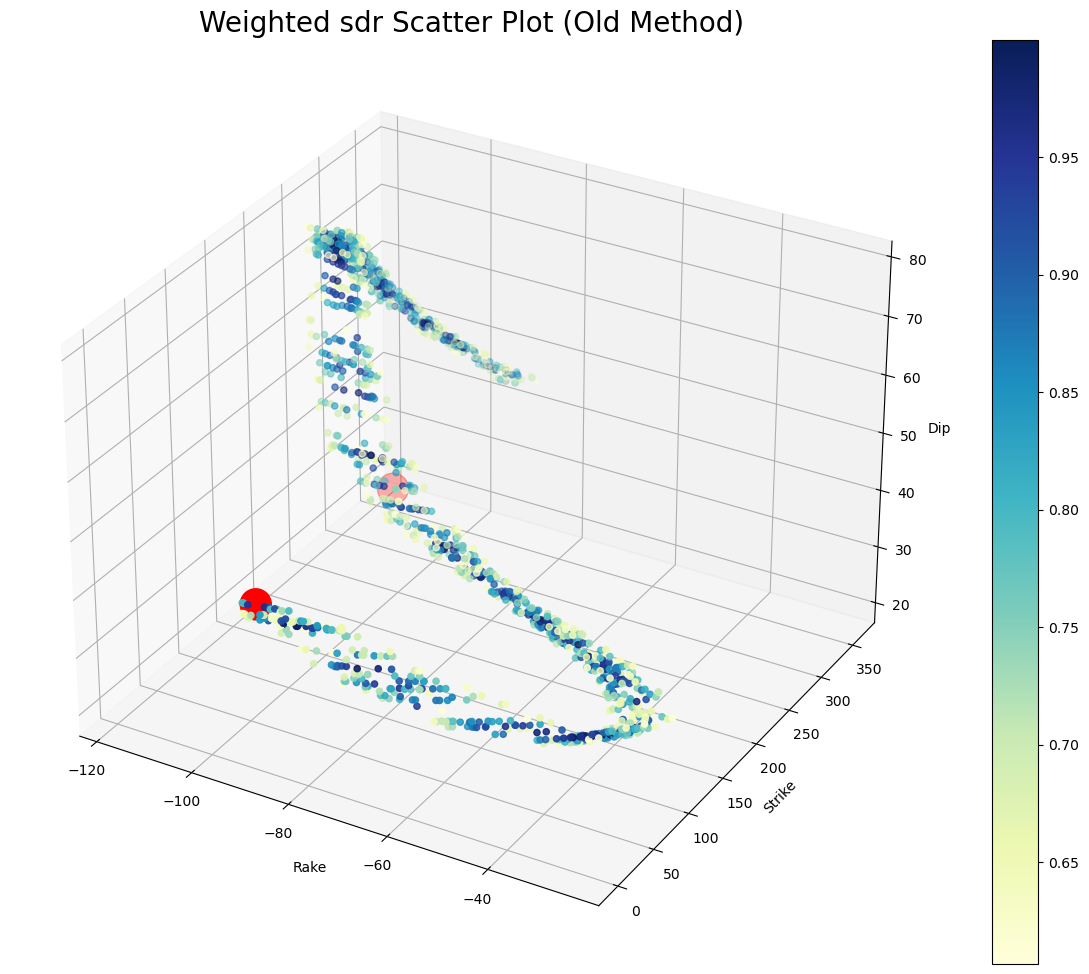

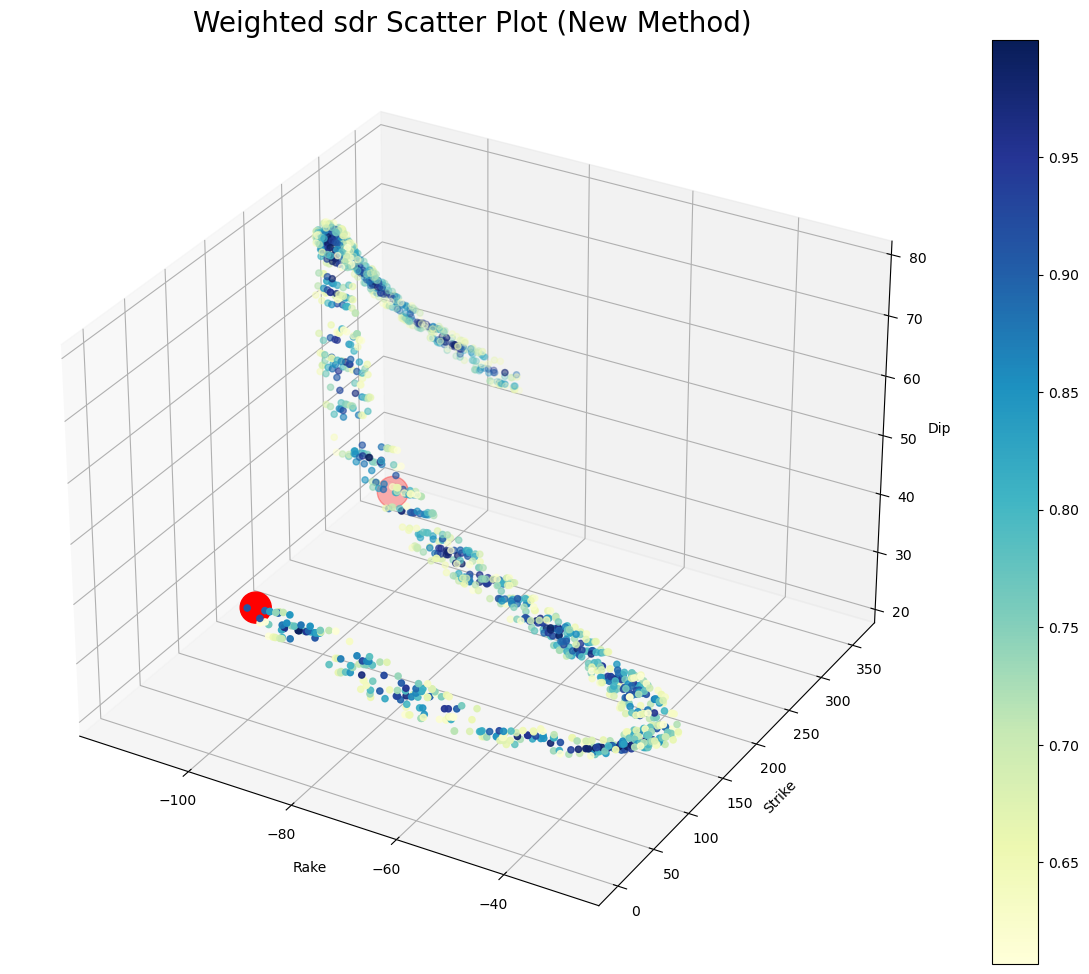

In [14]:
# 3D sdr scatter plot

# Ao = np.array([-0.81021954, -4.91714978, 2.19851802])
# Uo = np.array([0.02231451, 0.13542476, 0.06055007])
t, p = np.array([1,0,0]), np.array([0,0,1])
normal_faults = fr.tp2sdr(fr.coord_switch(t), fr.coord_switch(p))
normal_faults = np.rad2deg(np.array(normal_faults))

fr.weighted_3D_scatter(df[old_accepted1], "OldWeight", normal_faults)
fr.weighted_3D_scatter(df[accepted1], "Weight", normal_faults)

In [15]:
# Explain the S-shape
# The red circles seem to be in the middle of the paths they came from
# Compare with weighted average

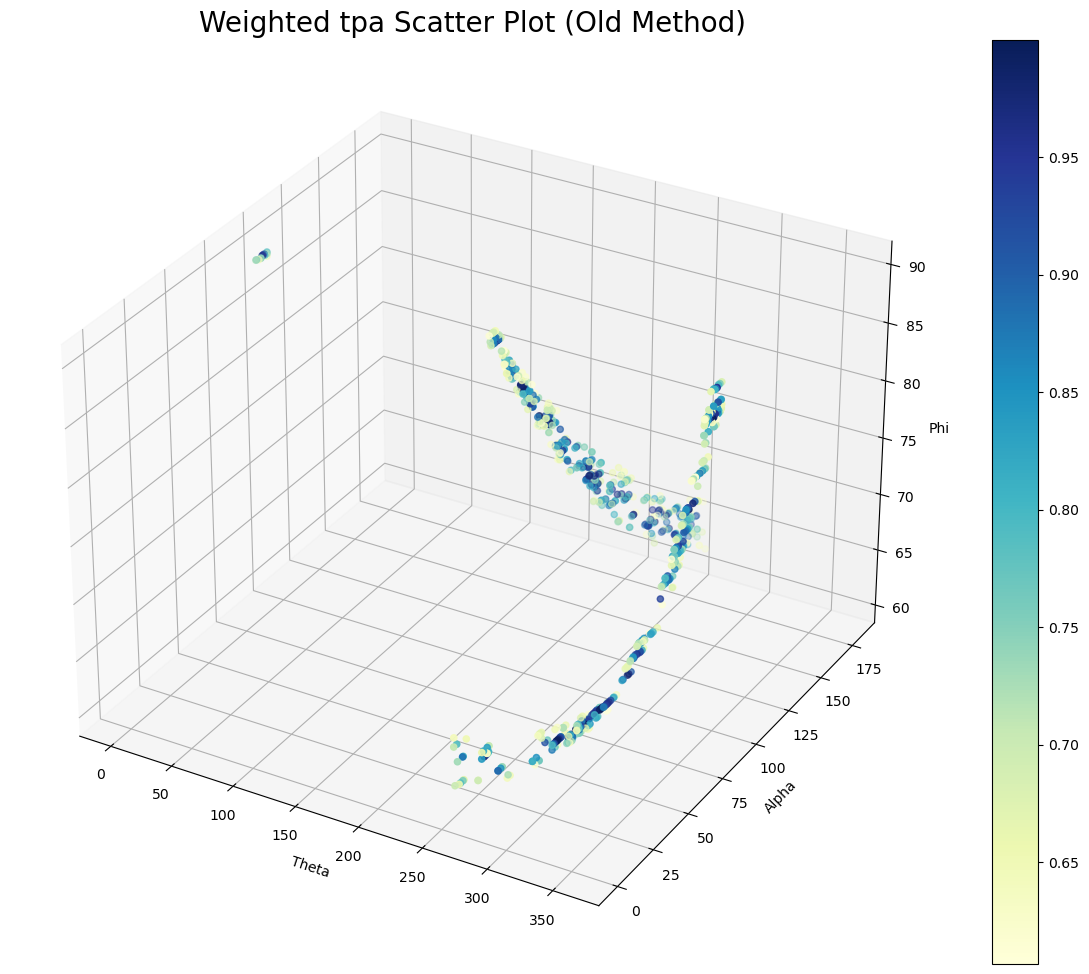

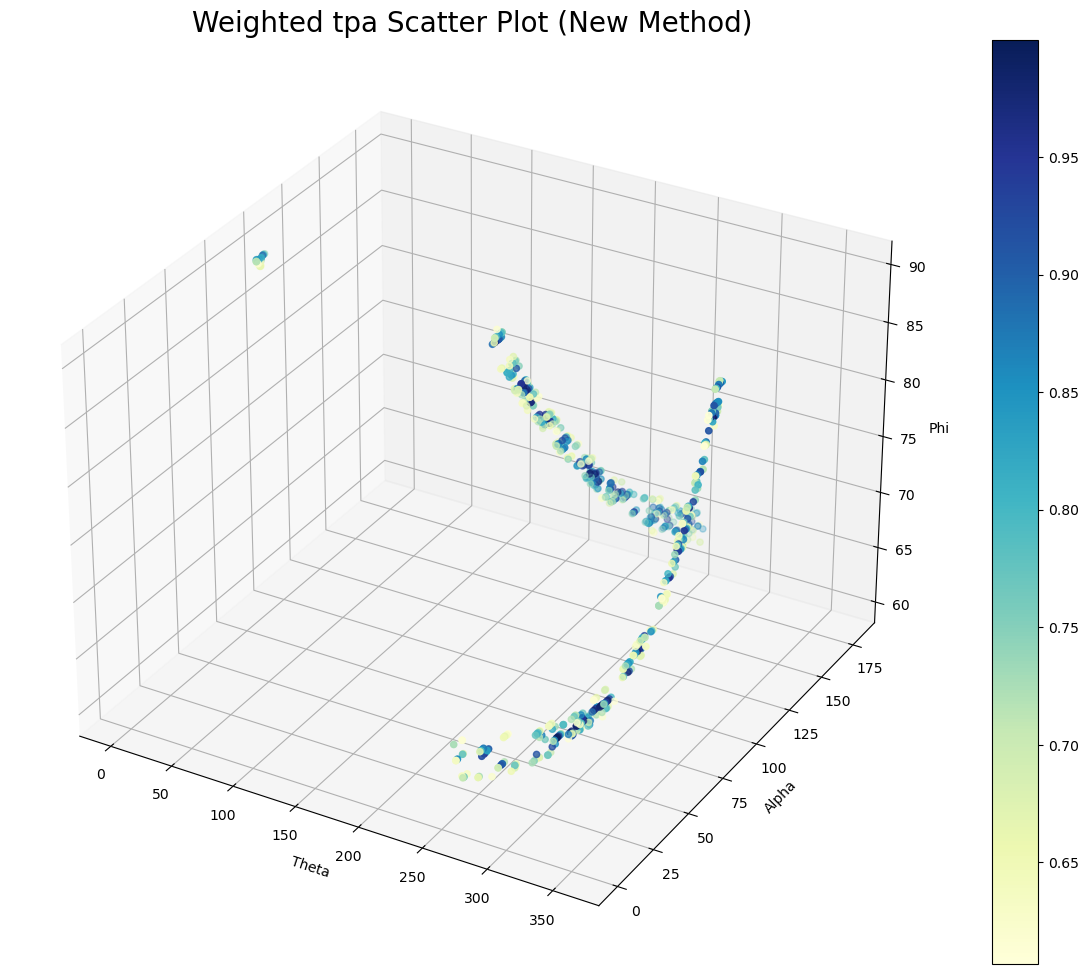

In [16]:
# 3D tpa scatter plot

fr.weighted_3D_scatter(df[old_accepted1], "OldWeight", type="tpa")
fr.weighted_3D_scatter(df[accepted1], "Weight", type="tpa")

# repeat patten/extend grid

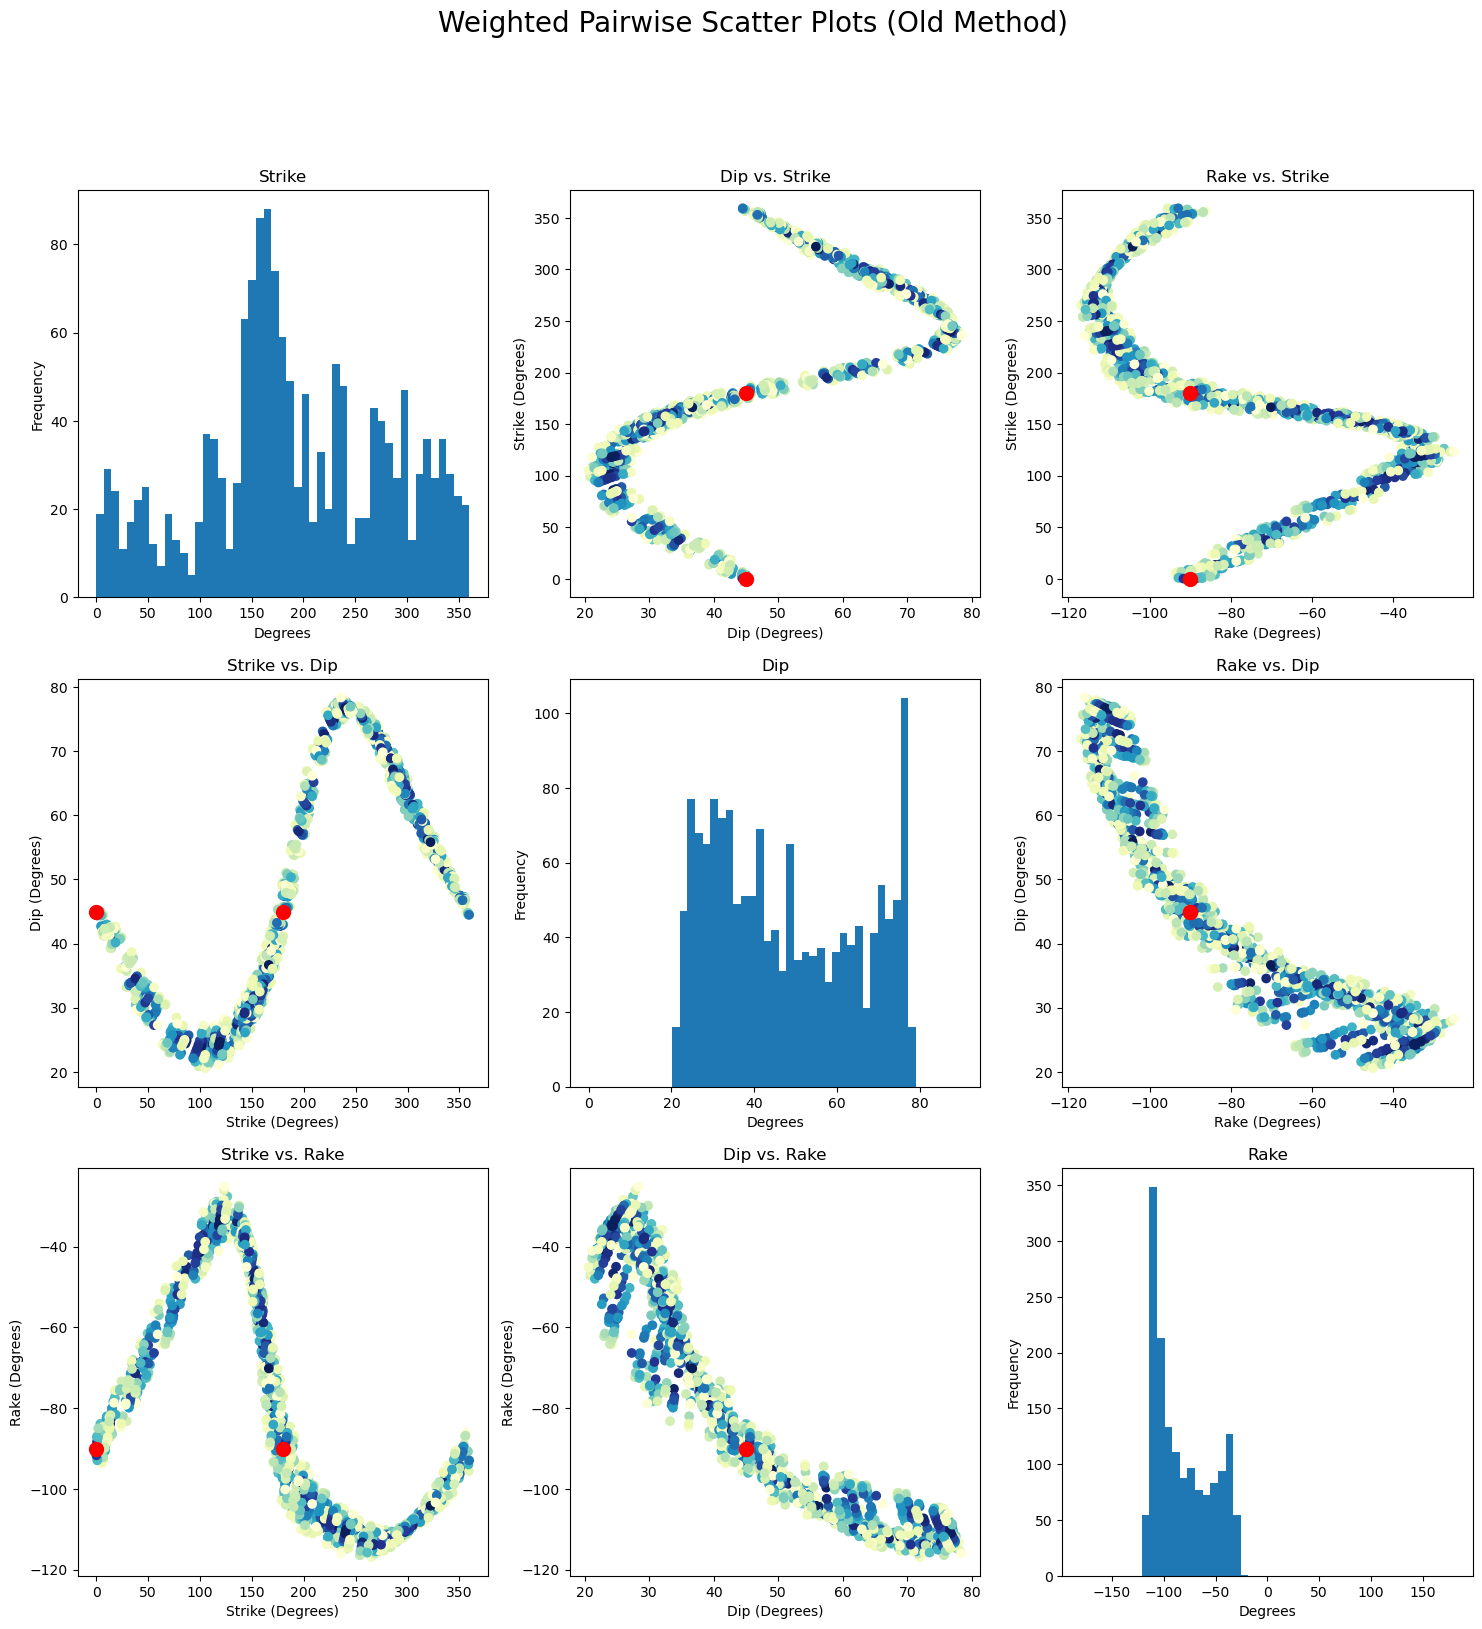

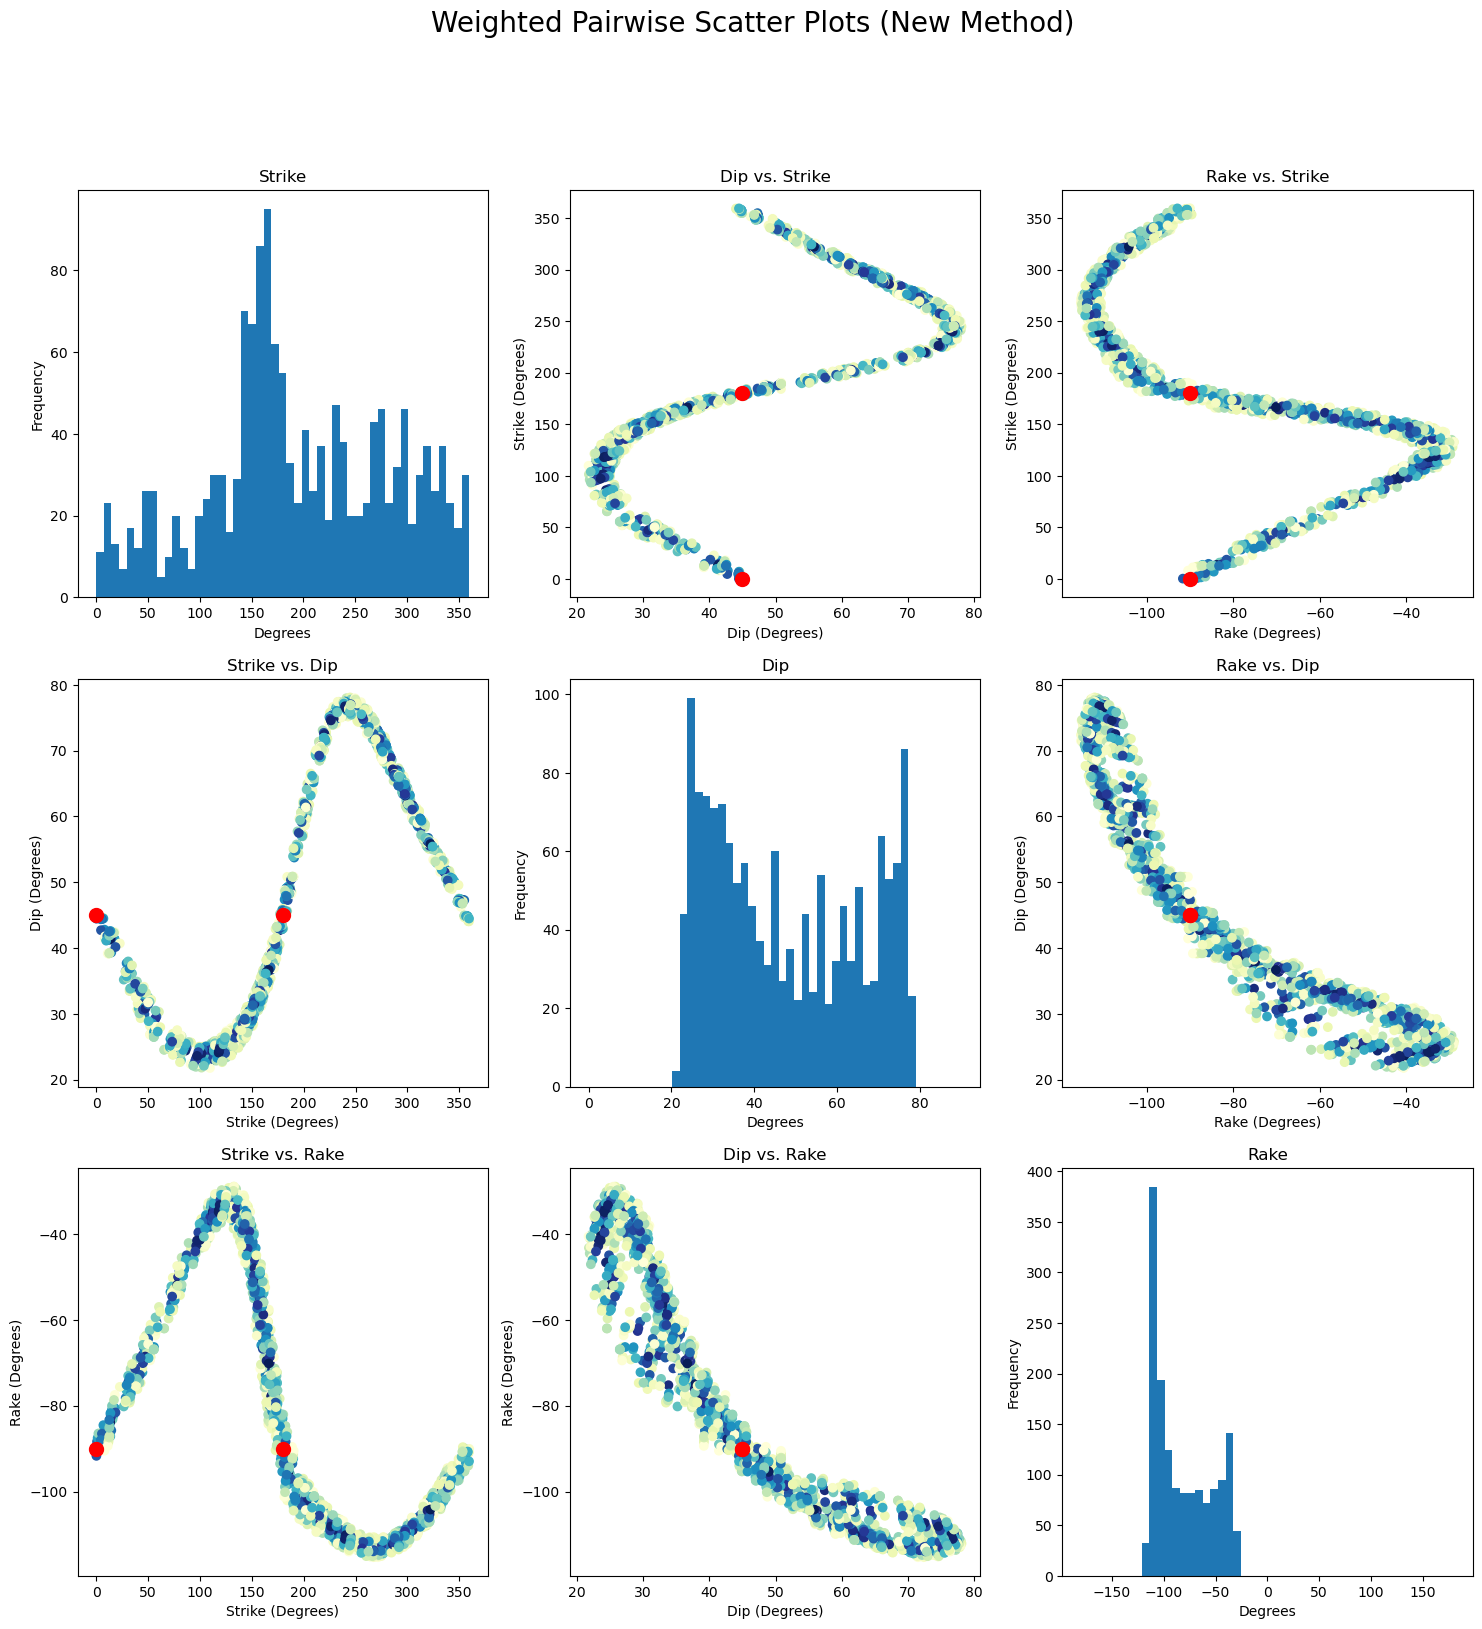

In [17]:

# grid of pairwise scatter plots
fr.weighted_pairwise_scatter(df[old_accepted1], "OldWeight", true_sol = normal_faults)
fr.weighted_pairwise_scatter(df[accepted1], "Weight", true_sol = normal_faults)
# marker for true soln in histogram

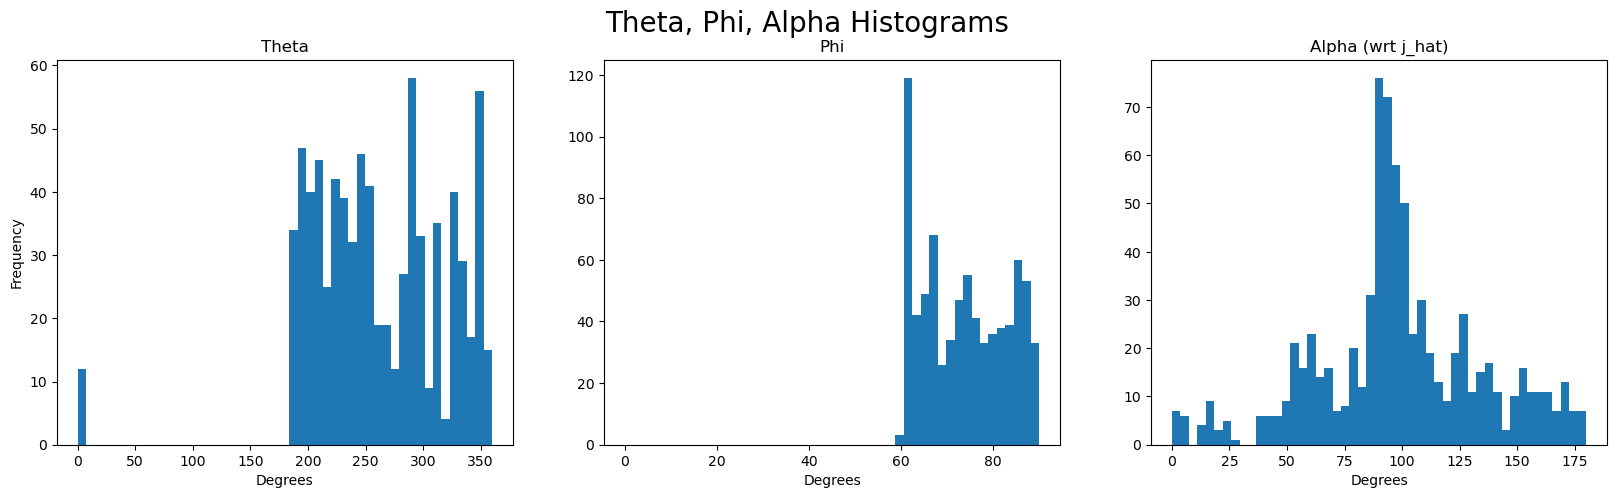

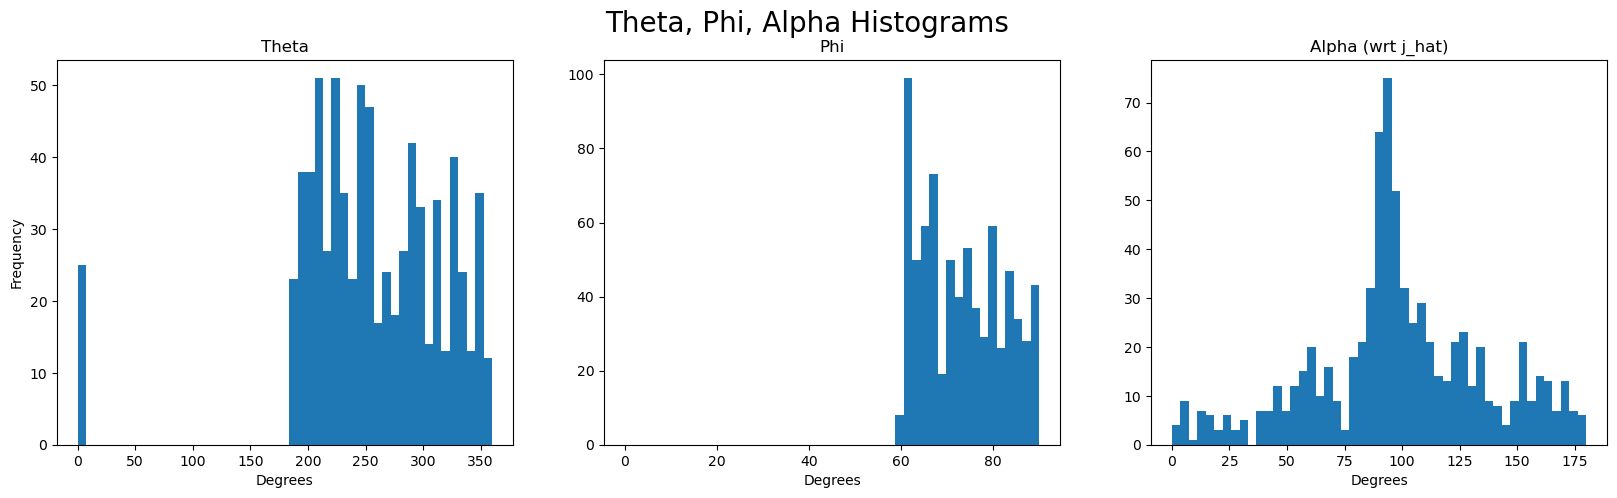

In [18]:
# grid of pairwise scatter plots
fr.weighted_pairwise_scatter(df[old_accepted1], "OldWeight", type="tpa")
fr.weighted_pairwise_scatter(df[accepted1], "Weight", type="tpa")

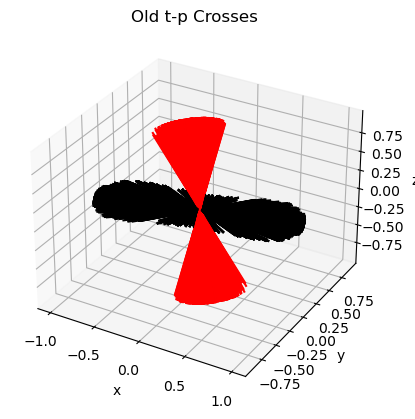

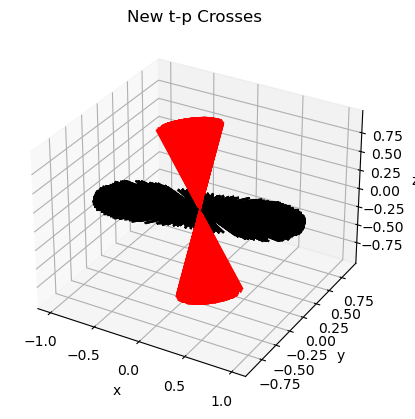

In [32]:
fr.plot_crosses(df[old_accepted1], "Old")
fr.plot_crosses(df[accepted1], "New")

In [ ]:
# BEACHBALLS!



In [ ]:
# beachballs, consider weight
# omkar's code (GitHub)
# proper labelling of previous graphs

# amplitude space (generate data, plot) categorizing breadth vs depth
# consider smaller errors, see how close you can get
# sensitivity analysis of errors**
# overlay histograms of accepted/rejected guesses
# tp crosses on sphere
# collapsing dimensions in space
# same mechanism, different azimuths/epicentral depths
# map from sdr to amplitudes
# in what ways can I visualize parts of this data?
# what variables to vary?
    # azimuth, epicentral depth, takeoff angle, amplitude, uncertainty
# coarse subdivisions of space
# KEEP THE BALL MOVING!

# fix b3_over_a3 in fr.apply_inverse_methods (just notational)

# working with seeds

# STATISTICAL METHODS
# 1. Hypothesis testing
# 2. Inference from samples
# 3. Estimation of parameters
# 4. Predictive regression/methods
# 5. Potential machine learning methods
# 6. Collapsing dimensions in space
# 7. Sensitivity analysis of errors - how close can I get?

# GET RELEVANT PAPERS, ASK SUZAN AS WELL
# 1. Maddy's paper
# 2. The one I used for ellipsoidal projections
# 3. Matthew Plumlee - uncertainty quantification, model calibration, large scale simulations
# 4. Elliptical slice sampling, learn more about it
# 5. Textbooks (statistical methods)

# I NEED A SYSTEM FOR GETTING FROM HERE TO A FIRST DRAFT

In [24]:
print(df.iloc[0])

Theta        252.822459
Phi           67.038541
Alpha        166.040541
tx            -0.271934
ty            -0.879696
tz             0.390112
px             0.290293
py            -0.461492
pz            -0.838305
Strike1      269.215713
Dip1          71.523235
Rake1       -113.676050
Strike2      143.356881
Dip2          29.701155
Rake2        -39.764030
OldWeight      0.887631
Weight         0.850971
Name: 0, dtype: float64


### Model comparisons

* What metrics can we use?
* Different ways of weighting
* Are s,d,r dependent?
* If not, to what extent does ... account for the dependencies?